# 3회차: DNN을 활용한 심장병 판별 (1) – 이론 및 데이터 분석

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# NaN, missing value 확인
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
# 데이터 시각화 그림 선명하도록 설정
%config InlineBackend.figure_format = 'retina'

# 데이터 시각화 패키지 메모리 로드
import seaborn as sns
import matplotlib.pyplot as plt

# 그림 크기 지정
plt.figure(figsize=(8,6));

# Colab에서 한글 설정
!pip install koreanize-matplotlib
import koreanize_matplotlib

<Figure size 800x600 with 0 Axes>

In [ ]:
# plt.figure(figsize=(5,3))
plt.rcParams.update({'figure.figsize': (4, 3)})

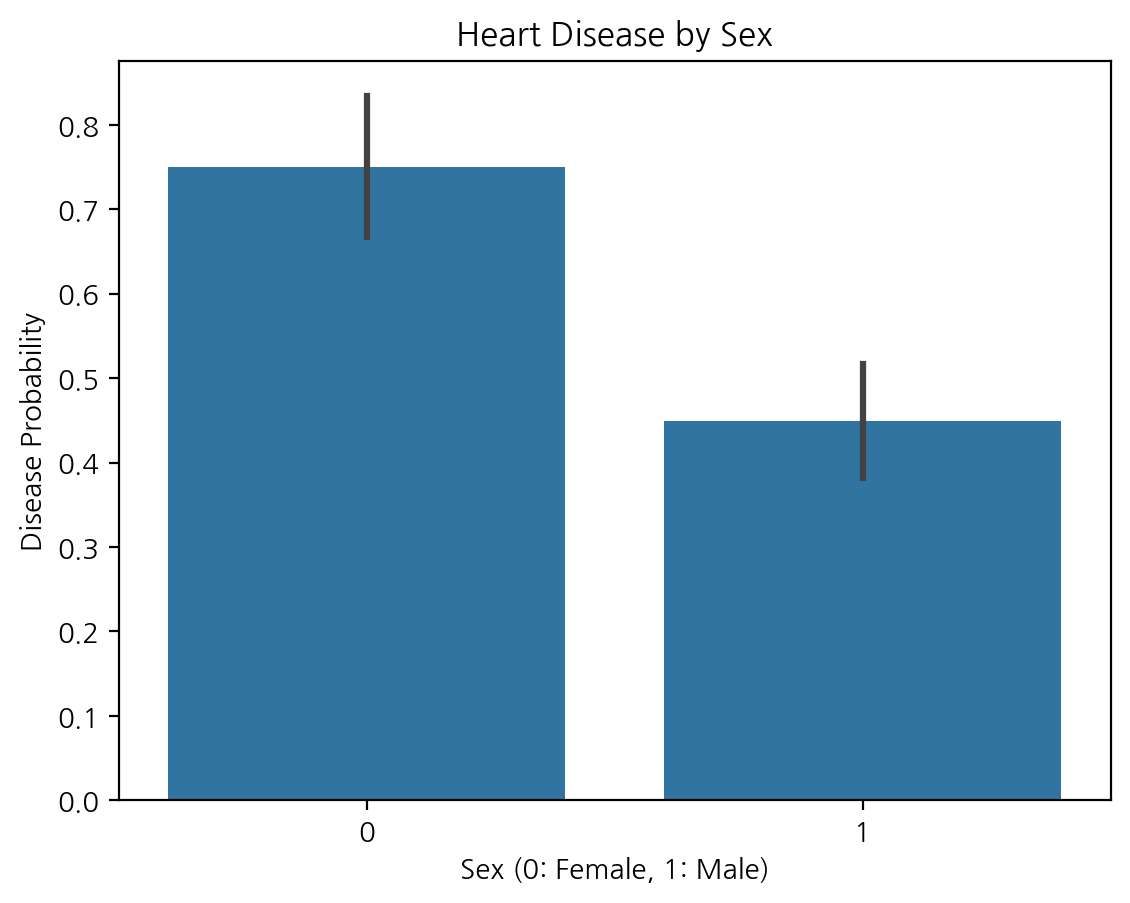

In [ ]:
sns.barplot(x='sex', y='target', data=df)
plt.title("Heart Disease by Sex")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Disease Probability")
plt.show()

In [ ]:
df.cp.value_counts()

,count
cp,
0,143
2,87
1,50
3,23


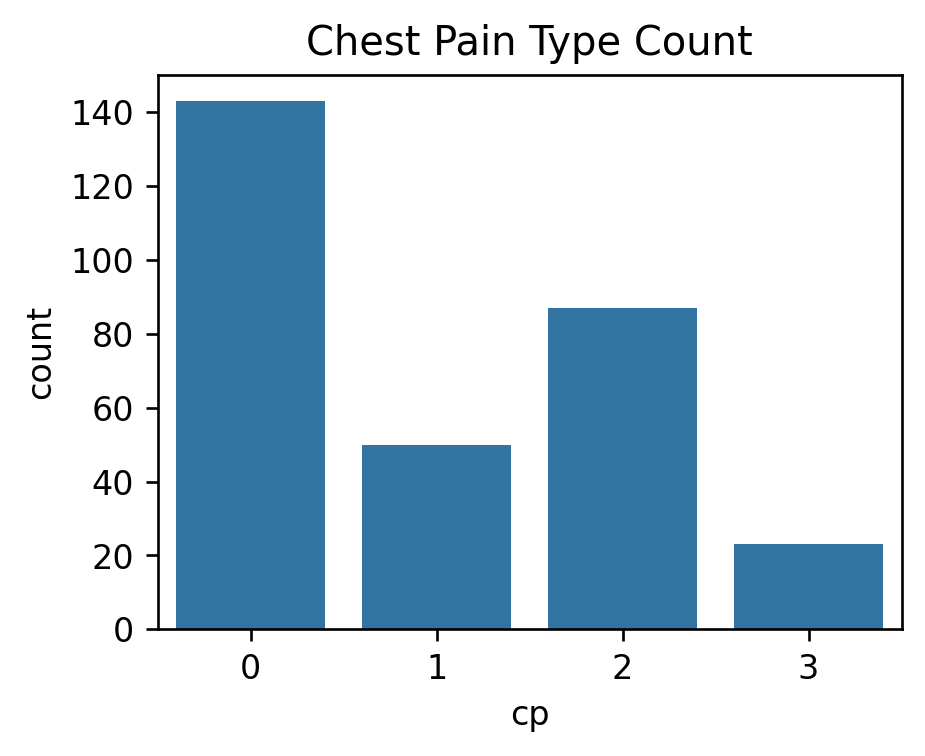

In [ ]:
sns.countplot(x='cp', data=df)
plt.title("Chest Pain Type Count")
plt.show()

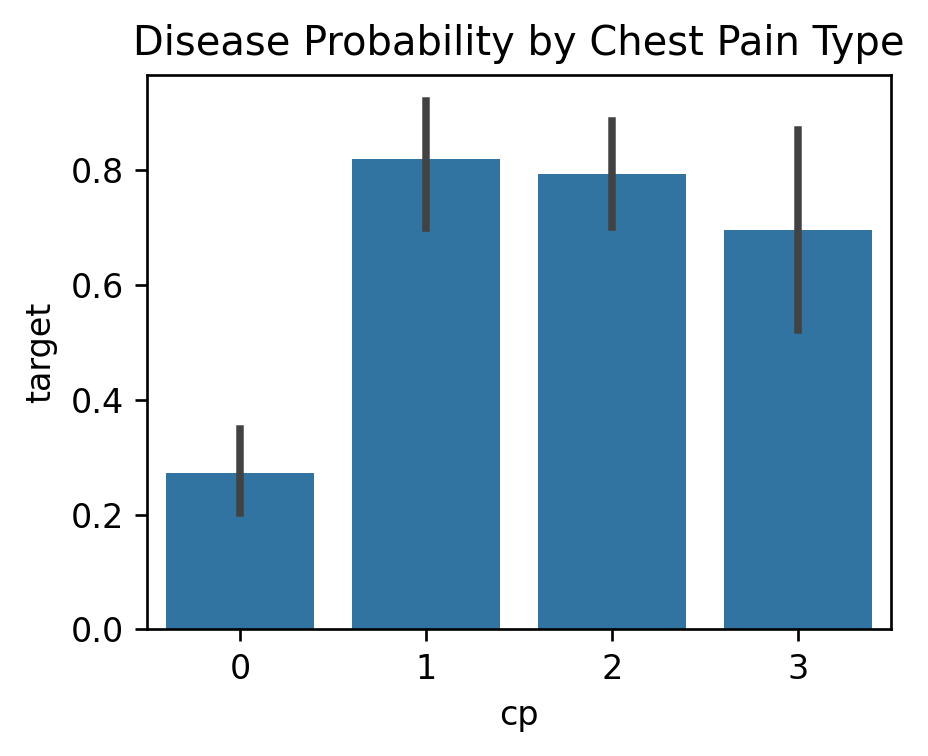

In [ ]:
sns.barplot(x='cp', y='target', data=df)
plt.title("Disease Probability by Chest Pain Type")
plt.show()

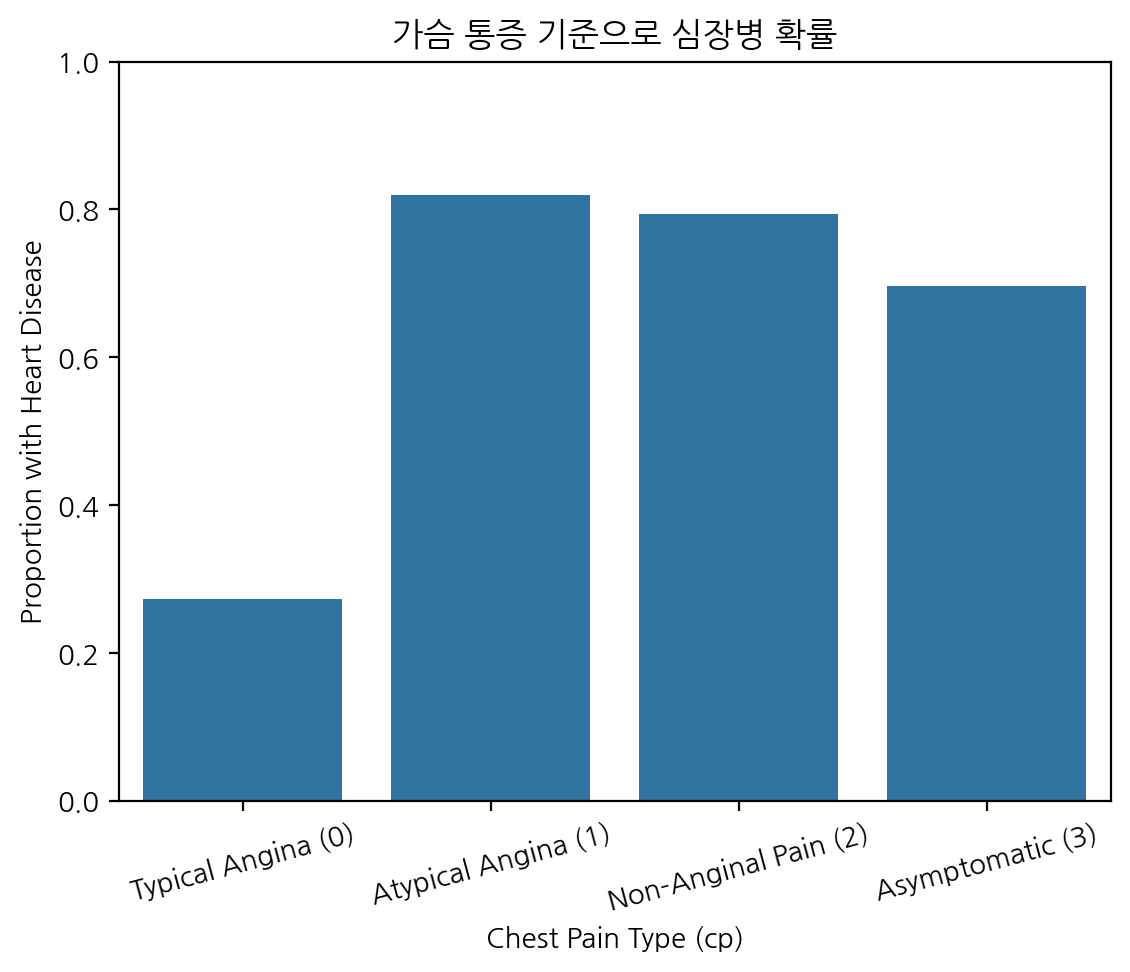

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)

# 시각화
sns.barplot(data=df, x='cp', y='target', errorbar=None);
plt.title("가슴 통증 기준으로 심장병 확률")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Proportion with Heart Disease")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Typical Angina (0)",
                                       "Atypical Angina (1)",
                                       "Non-Anginal Pain (2)",
                                       "Asymptomatic (3)"], rotation=15)
plt.ylim(0, 1)
plt.show()

## 심화 학습

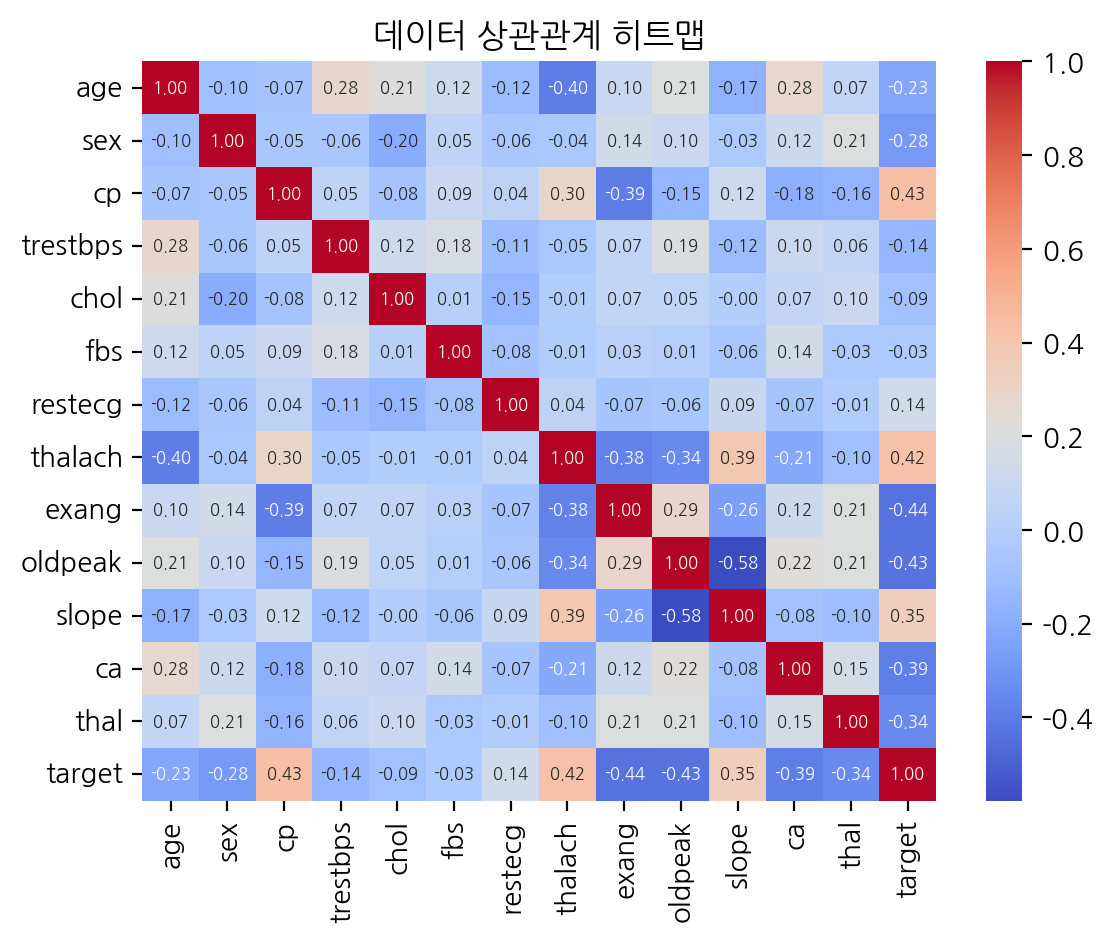

In [ ]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 6}, fmt=".2f", cmap='coolwarm')
plt.title("데이터 상관관계 히트맵")
plt.show()

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. 사용자 정의 Dataset 클래스
class HeartDiseaseDataset(Dataset):
    def __init__(self, csv_url):
        # CSV 파일 다운로드 및 로딩
        df = pd.read_csv(csv_url)

        # 특성과 라벨 분리
        self.X = df.drop('target', axis=1).values
        self.y = df['target'].values

        # 특성 정규화
        scaler = StandardScaler()
        self.X = scaler.fit_transform(self.X)

        # NumPy → Tensor로 변환
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# 2. UCI Heart Disease Dataset URL
csv_url = 'https://raw.githubusercontent.com/datablist/heart-disease-dataset/main/heart.csv'

# 3. 데이터셋 로딩
dataset = HeartDiseaseDataset(csv_url)

# 4. DataLoader 생성
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 5. 데이터 배치 확인
for X_batch, y_batch in dataloader:
    print(f"X batch shape: {X_batch.shape}, y batch shape: {y_batch.shape}")
    break


## End of code